In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import geopandas as gpd
from sklearn.linear_model import LinearRegression

In [2]:
air = pd.read_csv('data/india_air_quality.csv')

/home/hanzhi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
life = pd.read_csv('data/India Life Expectancy.csv')

In [4]:
states = gpd.read_file('data/INDIA.shp')

In [5]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       36 non-null     object  
 1   Categorie  36 non-null     object  
 2   Country    36 non-null     object  
 3   geometry   36 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.2+ KB


In [6]:
states.Name[9] = "jammu & kashmir"

/home/hanzhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
states['Name'] = states['Name'].str.lower()

In [8]:
life.drop(['Rank'],axis=1,inplace=True)

In [9]:
life['State'] = life['State'].str.lower()

In [10]:
life = life.rename(columns = {'Life_Expectancy_at_Birth':'Expected_Span','Avg_Life_Expectancy':'Actual_Span'})

In [11]:
life

,State,Expected_Span,Actual_Span,Male,Female
0,andhra pradesh,68.5,70.25,68.4,72.1
1,assam,63.9,66.20,65.6,66.8
2,bihar,68.1,69.90,69.6,70.2
3,chhattisgarh,64.8,63.60,61.6,65.7
4,delhi,73.2,72.85,71.8,73.9
5,gujarat,68.7,69.50,67.4,71.8
6,haryana,68.6,69.60,68.0,71.4
7,himachal pradesh,71.6,72.30,69.4,75.5
8,jammu & kashmir,73.6,73.50,71.6,76.2
9,jharkhand,66.6,66.15,65.5,66.8


In [12]:
life.State.unique()

array(['andhra pradesh', 'assam', 'bihar', 'chhattisgarh', 'delhi',
       'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir',
       'jharkhand', 'karnataka', 'kerala', 'madhya pradesh',
       'maharashtra', 'odisha', 'punjab', 'rajasthan', 'tamil nadu',
       'uttar pradesh', 'uttarakhand', 'west bengal'], dtype=object)

In [13]:
state_life = life[['Actual_Span','State']].merge(states, left_on = 'State', right_on = 'Name',how = 'left')
state_life

,Actual_Span,State,Name,Categorie,Country,geometry
0,70.25,andhra pradesh,andhra pradesh,State,INDIA,"MULTIPOLYGON (((80.04988 15.04480, 80.04988 15..."
1,66.20,assam,assam,State,INDIA,"POLYGON ((94.00248 26.17458, 94.00126 26.17229..."
2,69.90,bihar,bihar,State,INDIA,"POLYGON ((86.18669 26.61505, 86.18938 26.61534..."
3,63.60,chhattisgarh,chhattisgarh,State,INDIA,"POLYGON ((81.08218 17.79411, 81.08149 17.79354..."
4,72.85,delhi,delhi,Union territory,INDIA,"POLYGON ((77.11768 28.48698, 77.11951 28.49514..."
5,69.50,gujarat,gujarat,State,INDIA,"MULTIPOLYGON (((68.70401 23.12451, 68.70373 23..."
6,69.60,haryana,haryana,State,INDIA,"POLYGON ((77.35259 28.49951, 77.36108 28.49868..."
7,72.30,himachal pradesh,himachal pradesh,State,INDIA,"POLYGON ((76.74737 33.17903, 76.74749 33.17963..."
8,73.50,jammu & kashmir,jammu & kashmir,Union territory,INDIA,"POLYGON ((76.74737 33.17903, 76.74586 33.17879..."
9,66.15,jharkhand,jharkhand,State,INDIA,"POLYGON ((86.65956 22.25633, 86.64946 22.26368..."


In [14]:
air['year'] = pd.to_numeric(air['date'].str[:4])

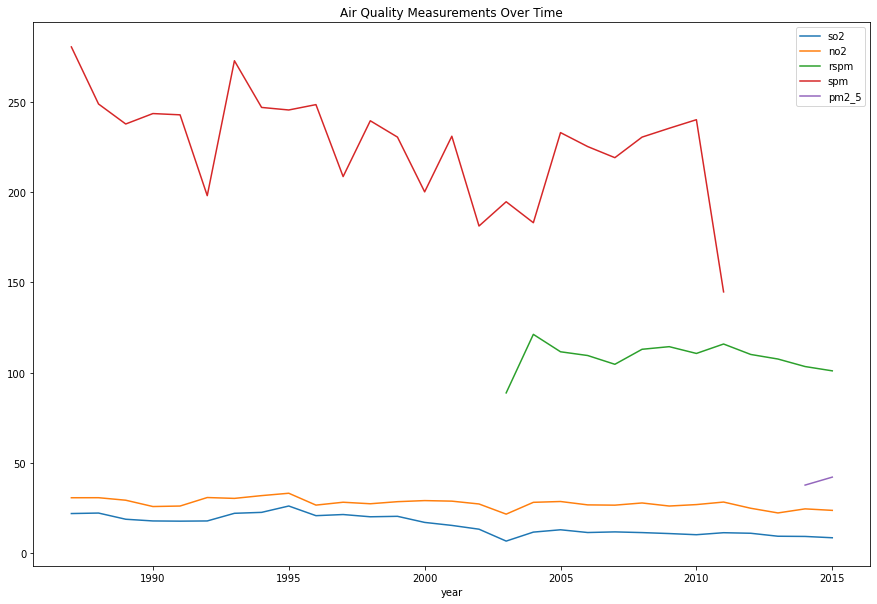

In [15]:
air_year = air.groupby('year')
air_year.mean().plot(figsize = (15,10))
plt.title('Air Quality Measurements Over Time')
plt.savefig('images/air_quality_over_time.png')

In [16]:
type(air.iloc[1]['spm'])

numpy.float64

In [17]:
air[air['spm'] > 0].head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
11,150.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,14.1,NaN,133.0,NaN,NaN,1990-06-01,1990.0
12,151.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,5.6,11.8,NaN,82.0,NaN,NaN,1990-06-01,1990.0
13,152.0,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.3,19.3,NaN,111.0,NaN,NaN,1990-06-01,1990.0
14,150.0,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,8.2,NaN,118.0,NaN,NaN,1990-07-01,1990.0
15,152.0,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.5,12.1,NaN,135.0,NaN,NaN,1990-07-01,1990.0


In [18]:
air['state'] = air['state'].str.lower()
air['location'] = air['location'].str.lower()

In [19]:
air_avg = air.groupby('state').mean()
air_avg.drop('year',axis = 1, inplace=True)
air_avg.dropna(how = 'all', inplace=True)

In [20]:
air_life_map = air_avg.merge(state_life,left_on = 'state', right_on = 'Name')
air_life_map = air_life_map[['State','so2','no2','rspm','Actual_Span','geometry']].set_index('State')
air_life_map

,so2,no2,rspm,Actual_Span,geometry
State,,,,,
andhra pradesh,7.284845,21.704451,78.182824,70.25,"MULTIPOLYGON (((80.04988 15.04480, 80.04988 15..."
assam,6.723263,14.793691,93.724912,66.20,"POLYGON ((94.00248 26.17458, 94.00126 26.17229..."
bihar,19.381476,36.575525,123.705176,69.90,"POLYGON ((86.18669 26.61505, 86.18938 26.61534..."
chhattisgarh,12.846609,24.815961,126.472399,63.60,"POLYGON ((81.08218 17.79411, 81.08149 17.79354..."
delhi,8.737273,53.489147,196.639771,72.85,"POLYGON ((77.11768 28.48698, 77.11951 28.49514..."
gujarat,16.656343,24.065631,98.244510,69.50,"MULTIPOLYGON (((68.70401 23.12451, 68.70373 23..."
haryana,14.064957,23.428311,149.860537,69.60,"POLYGON ((77.35259 28.49951, 77.36108 28.49868..."
himachal pradesh,2.667013,13.658688,91.870202,72.30,"POLYGON ((76.74737 33.17903, 76.74749 33.17963..."
jammu & kashmir,7.180521,12.213181,117.449483,73.50,"POLYGON ((76.74737 33.17903, 76.74586 33.17879..."


In [21]:
air_life_map['Life_Norm']=(air_life_map.Actual_Span-air_life_map.Actual_Span.min())/(air_life_map.Actual_Span.max()-air_life_map.Actual_Span.min())

In [22]:
air_gpd = gpd.GeoDataFrame(air_life_map, geometry = 'geometry')

In [23]:
type(air_gpd.iloc[0,4])

shapely.geometry.multipolygon.MultiPolygon

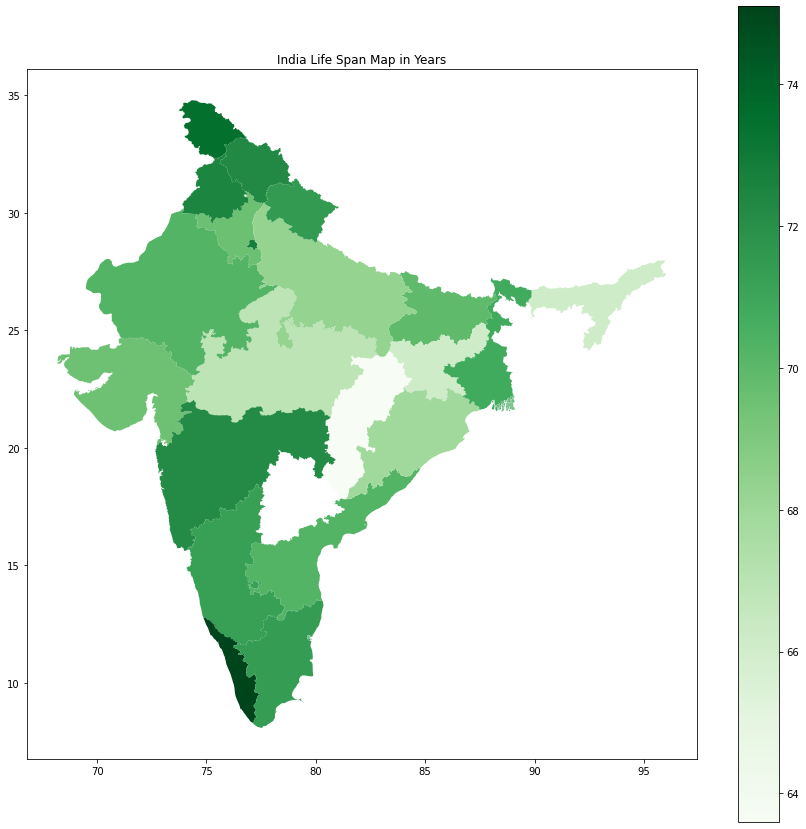

In [24]:
cmap = plt.cm.Greens
norm = matplotlib.colors.Normalize(vmin=air_gpd.Actual_Span.min(), vmax=air_gpd.Actual_Span.max())
air_gpd.plot(color = cmap(norm(air_gpd.Actual_Span)), figsize=(15,15))
plt.title('India Life Span Map in Years')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
plt.colorbar(sm)
plt.savefig('images/life_span_map')

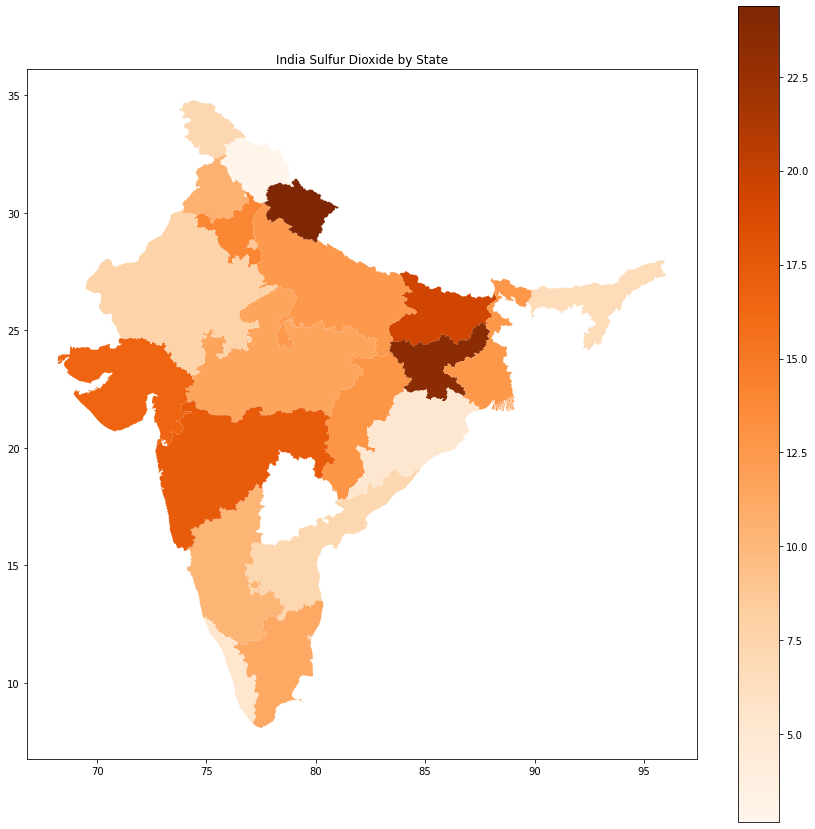

In [25]:
cmap = plt.cm.Oranges
norm = matplotlib.colors.Normalize(vmin=air_gpd.so2.min(), vmax=air_gpd.so2.max())
air_gpd.plot(color = cmap(norm(air_gpd.so2)), figsize=(15,15))
plt.title('India Sulfur Dioxide by State')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
plt.colorbar(sm)
plt.savefig('images/so2_map')

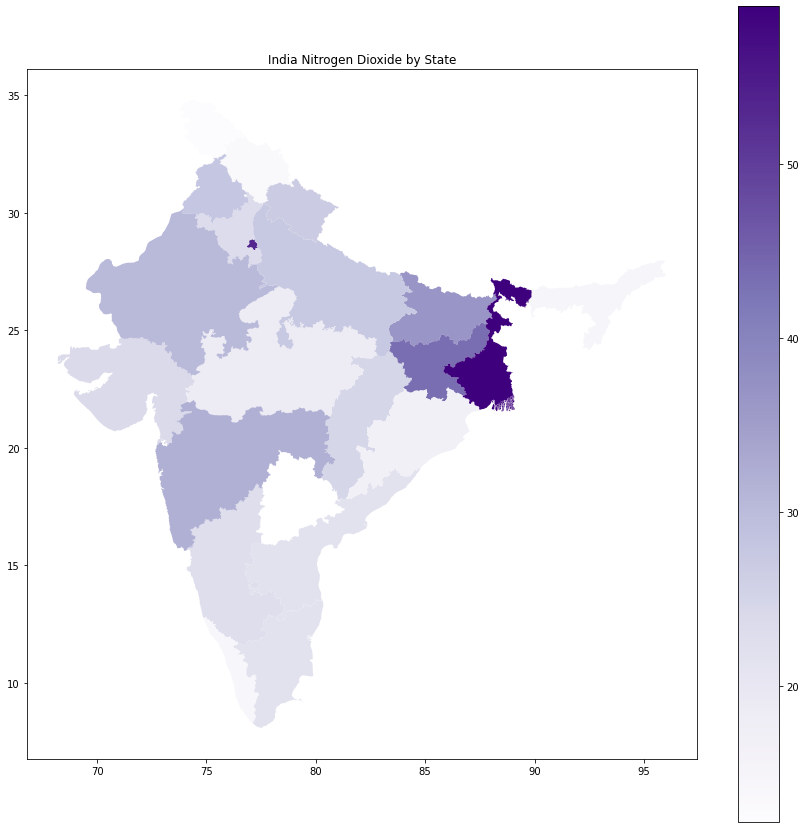

In [26]:
cmap = plt.cm.Purples
norm = matplotlib.colors.Normalize(vmin=air_gpd.no2.min(), vmax=air_gpd.no2.max())
air_gpd.plot(color = cmap(norm(air_gpd.no2)), figsize=(15,15))
plt.title('India Nitrogen Dioxide by State')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
plt.colorbar(sm)
plt.savefig('images/no2_map')

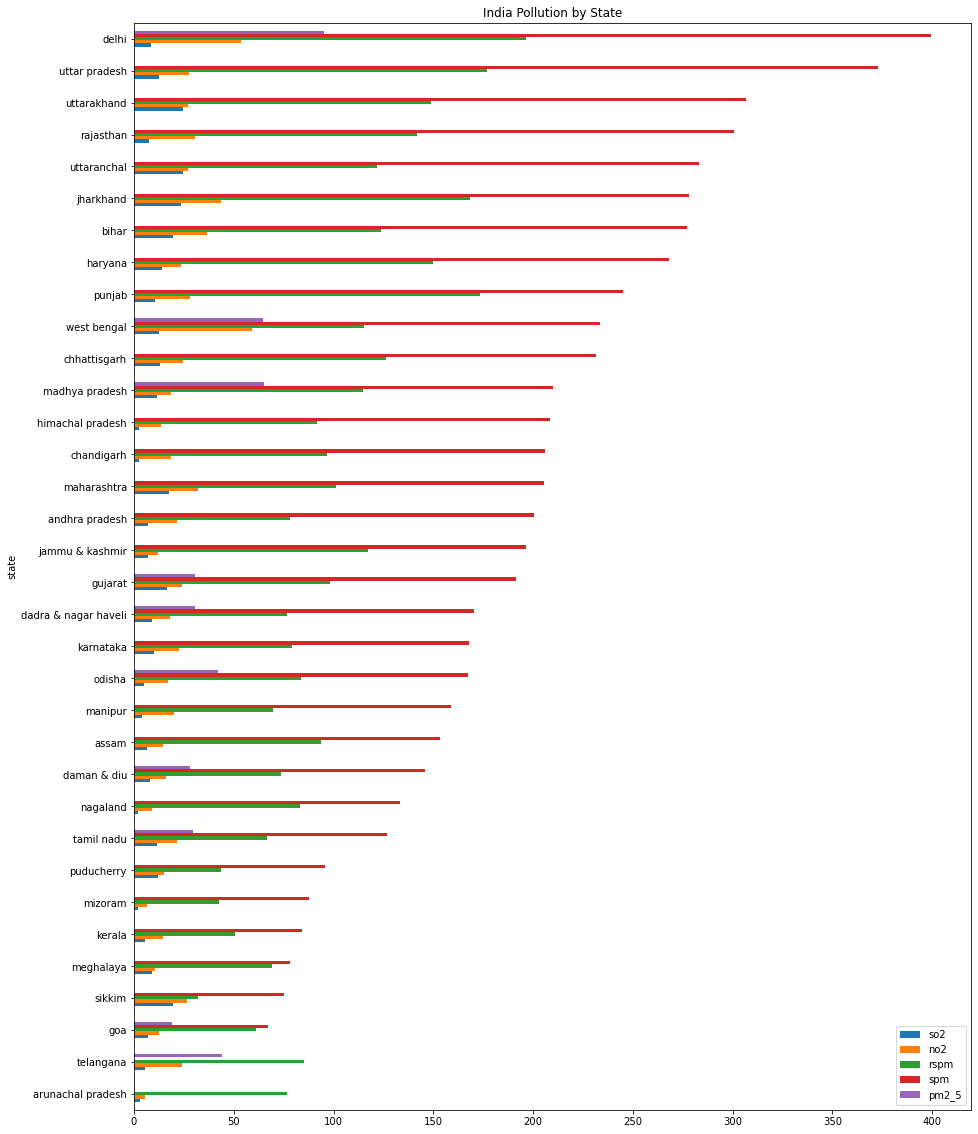

In [27]:
air_avg.sort_values('spm',na_position='first').plot(kind = 'barh', figsize = (15,20))
plt.title('India Pollution by State')
plt.savefig('images/state_air_pollution')

In [28]:
life_air_avg = air_avg.merge(life[['State','Actual_Span']], left_on = 'state', right_on = 'State')

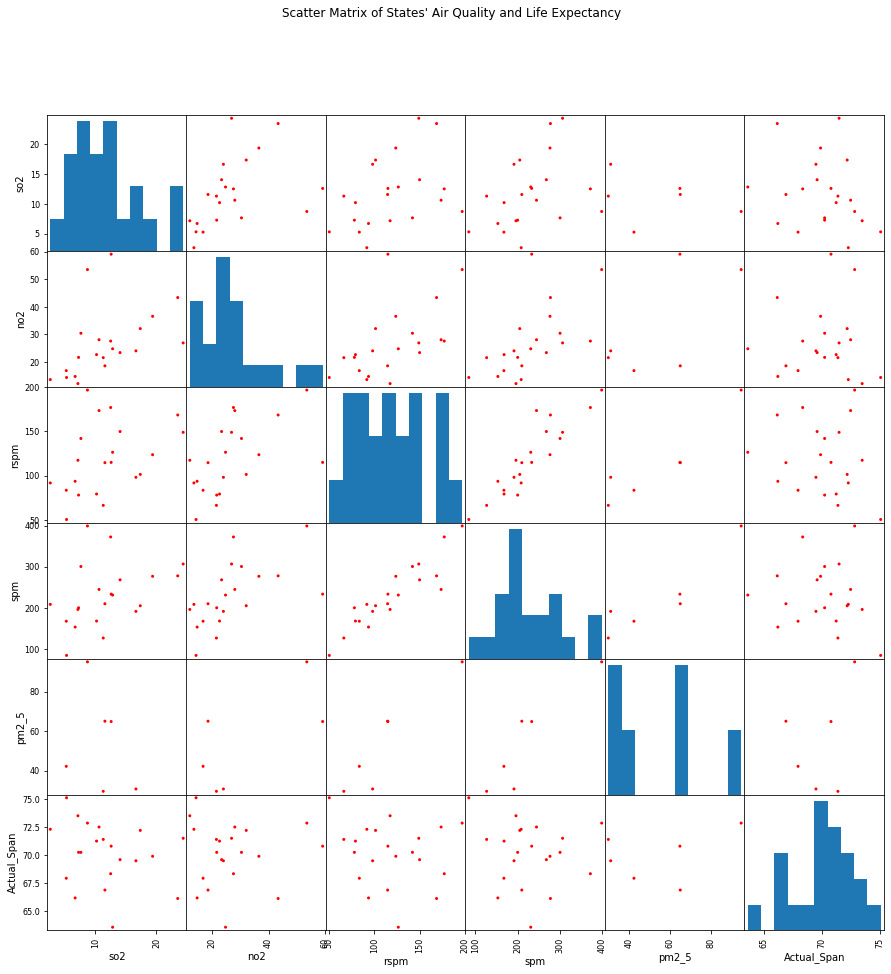

In [29]:
pd.plotting.scatter_matrix(life_air_avg, alpha = 1,figsize = (15,15),color = 'red');
# plt.title("Scatter Matrix of States' Air Quality and Life Expectancy" )
plt.suptitle("Scatter Matrix of States' Air Quality and Life Expectancy")
plt.savefig('images/scatter_matrix')

In [30]:
life_air_avg = life_air_avg.set_index('State')

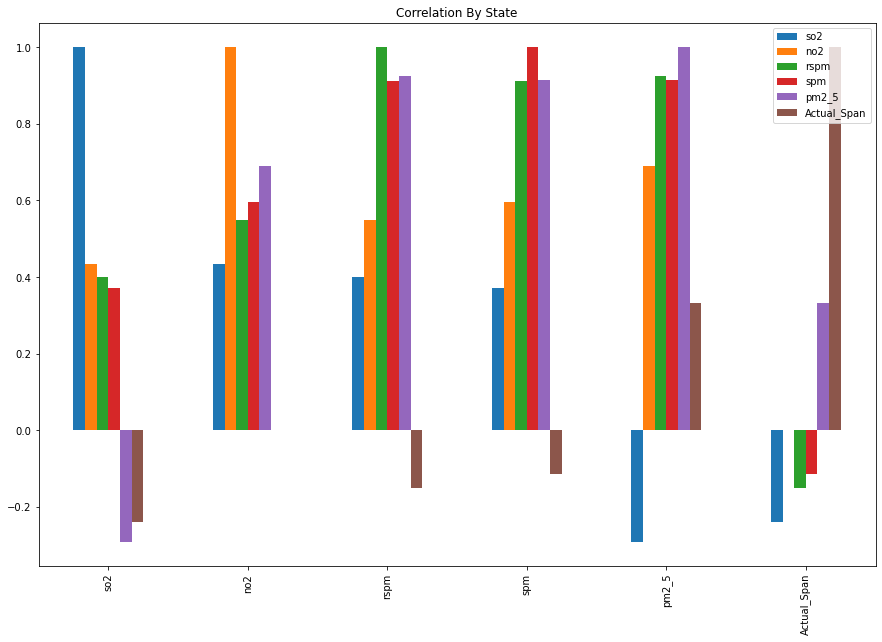

In [31]:
life_air_avg.corr().plot(kind = 'bar',figsize = (15,10))
plt.title('Correlation By State')
plt.savefig('images/life_air_corr')

In [32]:
life_air_avg

,so2,no2,rspm,spm,pm2_5,Actual_Span
State,,,,,,
andhra pradesh,7.284845,21.704451,78.182824,200.260378,NaN,70.25
assam,6.723263,14.793691,93.724912,153.355386,NaN,66.20
bihar,19.381476,36.575525,123.705176,276.917416,NaN,69.90
chhattisgarh,12.846609,24.815961,126.472399,231.290969,NaN,63.60
delhi,8.737273,53.489147,196.639771,399.402088,95.113208,72.85
gujarat,16.656343,24.065631,98.244510,191.567930,30.729696,69.50
haryana,14.064957,23.428311,149.860537,268.264804,NaN,69.60
himachal pradesh,2.667013,13.658688,91.870202,208.575630,NaN,72.30
jammu & kashmir,7.180521,12.213181,117.449483,196.221053,NaN,73.50


In [33]:
life_air_avg.corr()

,so2,no2,rspm,spm,pm2_5,Actual_Span
so2,1.000000,0.434234,0.399262,0.370581,-0.291411,-0.241074
no2,0.434234,1.000000,0.549125,0.596464,0.690616,-0.000013
rspm,0.399262,0.549125,1.000000,0.911177,0.926074,-0.152593
spm,0.370581,0.596464,0.911177,1.000000,0.915891,-0.113794
pm2_5,-0.291411,0.690616,0.926074,0.915891,1.000000,0.332107
Actual_Span,-0.241074,-0.000013,-0.152593,-0.113794,0.332107,1.000000


In [34]:
life_air_avg.rspm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               2.067429
gujarat             3.197054
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      1.763140
maharashtra              NaN
odisha              1.981320
punjab                   NaN
rajasthan                NaN
tamil nadu          2.253287
uttar pradesh            NaN
uttarakhand              NaN
west bengal         1.772828
dtype: float64

In [35]:
life_air_avg.spm / life_air_avg.pm2_5

State
andhra pradesh           NaN
assam                    NaN
bihar                    NaN
chhattisgarh             NaN
delhi               4.199228
gujarat             6.233968
haryana                  NaN
himachal pradesh         NaN
jammu & kashmir          NaN
jharkhand                NaN
karnataka                NaN
kerala                   NaN
madhya pradesh      3.228601
maharashtra              NaN
odisha              3.971412
punjab                   NaN
rajasthan                NaN
tamil nadu          4.288568
uttar pradesh            NaN
uttarakhand              NaN
west bengal         3.598463
dtype: float64

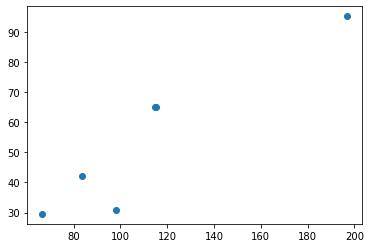

In [36]:
plt.scatter(life_air_avg.rspm , life_air_avg.pm2_5)


In [37]:
air.corr()

,so2,no2,rspm,spm,pm2_5,year
so2,1.000000,0.340555,0.165325,0.148325,0.035980,-0.196518
no2,0.340555,1.000000,0.369923,0.326170,0.509357,-0.077676
rspm,0.165325,0.369923,1.000000,0.801752,0.754709,-0.039412
spm,0.148325,0.326170,0.801752,1.000000,NaN,-0.030920
pm2_5,0.035980,0.509357,0.754709,NaN,1.000000,0.064030
year,-0.196518,-0.077676,-0.039412,-0.030920,0.064030,1.000000


In [41]:
noNaN = air[['rspm','pm2_5']].dropna().copy()


In [42]:
LR = LinearRegression().fit(noNaN.rspm.values.reshape(-1,1),noNaN.pm2_5)

In [43]:
LR.coef_,LR.intercept_

(array([0.44775662]), -0.4234880564407604)

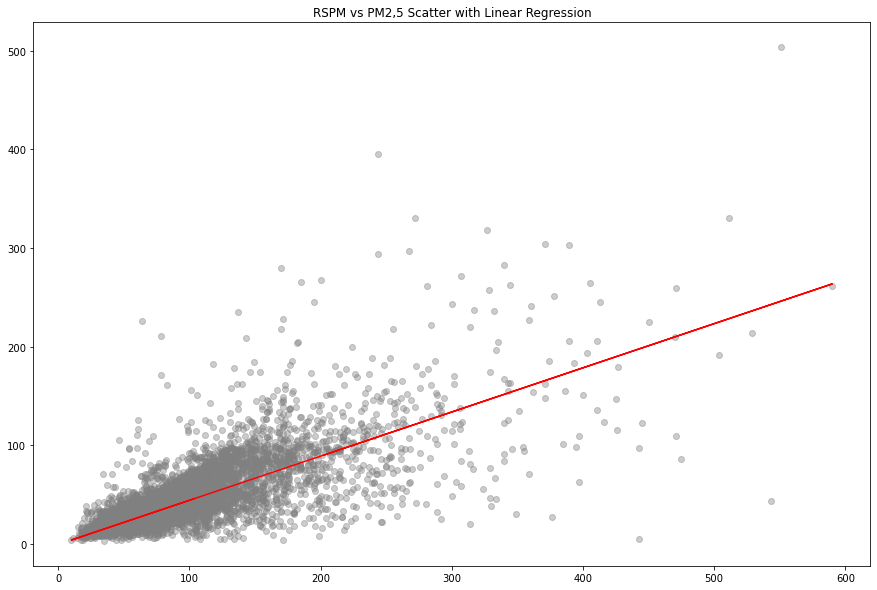

In [44]:
plt.figure(figsize = (15,10))
plt.scatter(air.rspm,air.pm2_5, alpha = .4,color = 'grey')
plt.plot(noNaN.rspm,noNaN.rspm*LR.coef_+LR.intercept_, color = 'red')
plt.title('RSPM vs PM2,5 Scatter with Linear Regression')

plt.savefig('images/RPSMvsPM2_5LinReg')

In [45]:
air['pm2_5'].fillna(air['rspm']*LR.coef_[0], inplace = True)

In [46]:
noNaN = air[['rspm','pm2_5','spm']].dropna().copy()

In [47]:
LR_rspm = LinearRegression().fit(noNaN.spm.values.reshape(-1,1),noNaN.rspm)

In [48]:
LR_pm25 = LinearRegression().fit(noNaN.spm.values.reshape(-1,1),noNaN.pm2_5)

In [49]:
air['rspm'].fillna(air['spm']*LR_rspm.coef_[0], inplace = True)

In [50]:
air['pm2_5'].fillna(air['spm']*LR_pm25.coef_[0], inplace = True)

In [51]:
air

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150.0,February - M021990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990.0
1,151.0,February - M021990,andhra pradesh,hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990.0
2,152.0,February - M021990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990.0
3,150.0,March - M031990,andhra pradesh,hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990.0
4,151.0,March - M031990,andhra pradesh,hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,west bengal,uluberia,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",64.029196,2015-12-24,2015.0
435738,SAMP,29-12-15,west bengal,uluberia,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",76.566381,2015-12-29,2015.0
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
predict_pm2_5 = air.groupby('state').mean()
predict_pm2_5.drop('year',axis = 1, inplace=True)
predict_pm2_5.dropna(how = 'all', inplace=True)
predict_pm2_5_life = predict_pm2_5.merge(life[['State','Actual_Span']], left_on = 'state', right_on = 'State').copy()
predict_pm2_5_life.set_index('State')

,so2,no2,rspm,spm,pm2_5,Actual_Span
State,,,,,,
andhra pradesh,7.284845,21.704451,77.678109,200.260378,34.780887,70.25
assam,6.723263,14.793691,93.044266,153.355386,41.661186,66.20
bihar,19.381476,36.575525,121.803240,276.917416,54.538206,69.90
chhattisgarh,12.846609,24.815961,124.418189,231.290969,55.709068,63.60
delhi,8.737273,53.489147,188.424734,399.402088,84.208675,72.85
gujarat,16.656343,24.065631,99.417964,191.567930,43.574606,69.50
haryana,14.064957,23.428311,147.552093,268.264804,66.067426,69.60
himachal pradesh,2.667013,13.658688,92.906273,208.575630,41.599398,72.30
jammu & kashmir,7.180521,12.213181,117.421660,196.221053,52.576325,73.50


In [53]:
predict_pm2_5_life.corr()

,so2,no2,rspm,spm,pm2_5,Actual_Span
so2,1.000000,0.434234,0.421574,0.370581,0.419020,-0.241074
no2,0.434234,1.000000,0.547194,0.596464,0.548515,-0.000013
rspm,0.421574,0.547194,1.000000,0.914890,0.999882,-0.169373
spm,0.370581,0.596464,0.914890,1.000000,0.914649,-0.113794
pm2_5,0.419020,0.548515,0.999882,0.914649,1.000000,-0.171224
Actual_Span,-0.241074,-0.000013,-0.169373,-0.113794,-0.171224,1.000000


<AxesSubplot:>

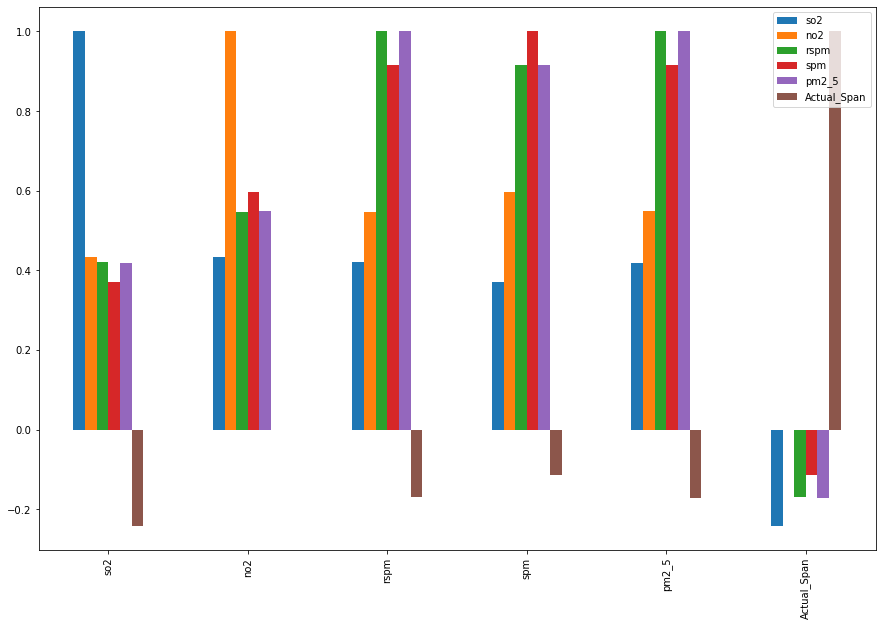

In [54]:
predict_pm2_5_life.corr().plot(kind='bar', figsize=(15,10))

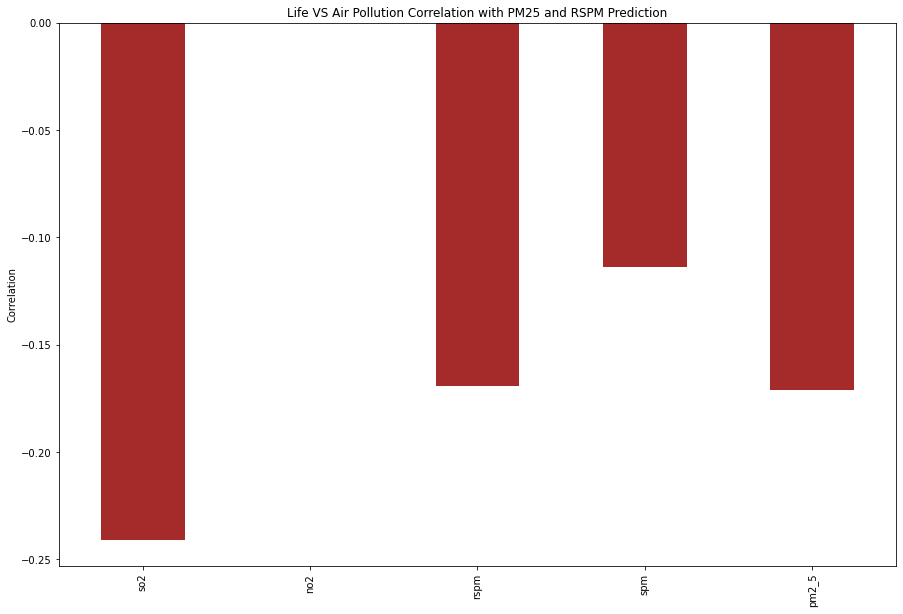

In [55]:
predict_pm2_5_life.corr().loc[['so2','no2','rspm','spm','pm2_5'],'Actual_Span'].plot(kind='bar',color = 'brown', figsize = (15,10))
plt.title('Life VS Air Pollution Correlation with PM25 and RSPM Prediction')
plt.ylabel('Correlation')
plt.savefig('images/life_air_corr_with_pm25_filled')

In [56]:
def bootstrap(df,cols):
    return df.sample(frac=1, replace = True)[cols].corr().iloc[0,1]

In [57]:
bootstrap_corr = [bootstrap(predict_pm2_5_life,['so2','Actual_Span']) for _ in range(3000)]

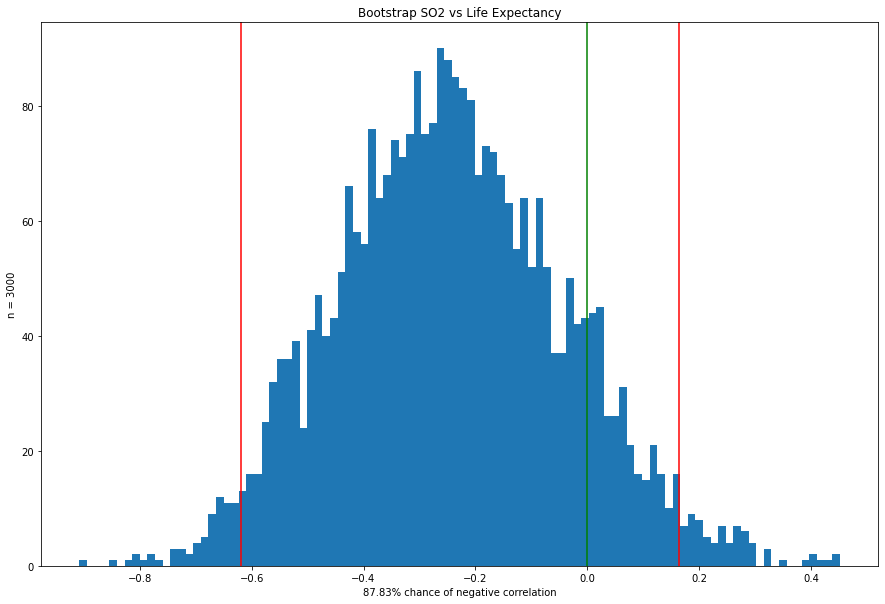

In [58]:
plt.figure(figsize = (15,10))
plt.hist(bootstrap_corr,bins = 100);
low,high = np.percentile(bootstrap_corr,[2.5,97.5])
plt.axvline(low,color = 'red')
plt.axvline(high,color = 'red')
plt.axvline(0,color = 'green')
plt.ylabel('n = 3000')
plt.xlabel(f'{round((np.array(bootstrap_corr)<0).mean()*100,2)}% chance of negative correlation')
plt.title('Bootstrap SO2 vs Life Expectancy')
plt.savefig('images/bootstrap_SO2.png')

In [59]:
(np.array(bootstrap_corr)<0).mean()

0.8783333333333333

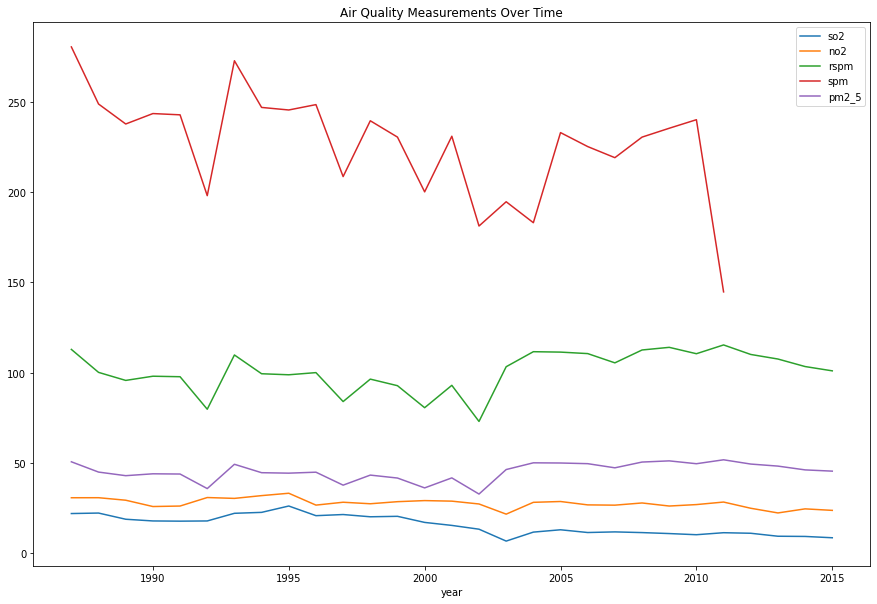

In [60]:
air_year = air.groupby('year')
air_year.mean().plot(figsize = (15,10))
plt.title('Air Quality Measurements Over Time')
plt.savefig('images/air_quality_over_time_filled.png')

In [61]:
bootstrap_corr_NO2 = [bootstrap(predict_pm2_5_life,['no2','Actual_Span']) for _ in range(3000)]

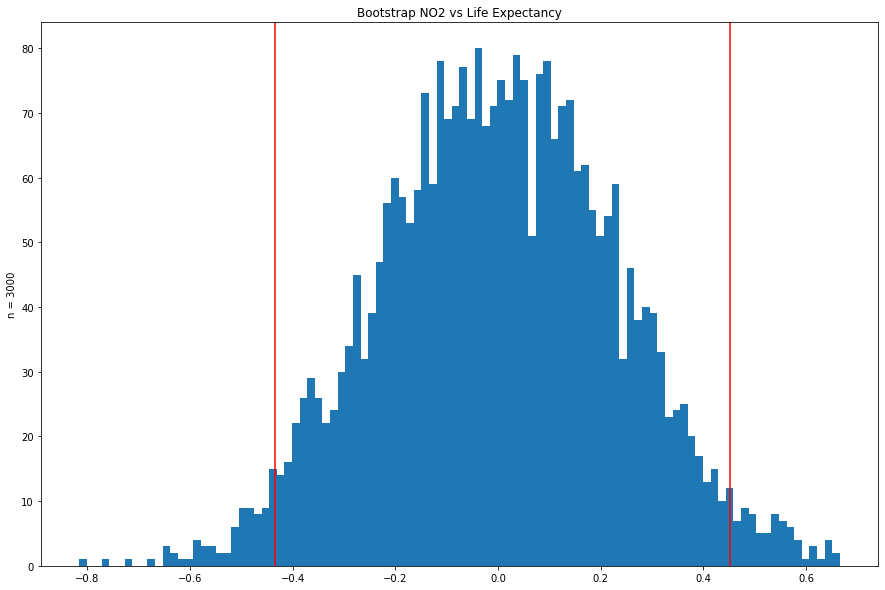

In [62]:
plt.figure(figsize = (15,10))
plt.hist(bootstrap_corr_NO2,bins = 100);
low,high = np.percentile(bootstrap_corr_NO2,[2.5,97.5])
plt.axvline(low,color = 'red')
plt.axvline(high,color = 'red')
plt.ylabel('n = 3000')
plt.title('Bootstrap NO2 vs Life Expectancy')
plt.savefig('images/bootstrap_NO2.png')